In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_vgsales.csv')

In [3]:
df_cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### The top publishers in terms of the number of games published

In [4]:
# Group the data by "Publisher" and calculate the count of games published
publisher_game_counts = df_cleaned.groupby('Publisher')['Name'].count()

# Find the top publishers based on the number of games published
top_publishers = publisher_game_counts.nlargest(10)  # Adjust the number as needed

print("Top Publishers in Terms of the Number of Games Published:")
print(top_publishers)

Top Publishers in Terms of the Number of Games Published:
Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Name, dtype: int64


##### Publisher with the highest total global sales

In [5]:
# Group the data by "Publisher" and calculate total global sales
publisher_sales = df_cleaned.groupby('Publisher')['Global_Sales'].sum()

# Find the publisher with the highest total global sales
publisher_with_highest_sales = publisher_sales.idxmax()
highest_sales = publisher_sales.max()

print(f"The publisher with the highest total global sales is '{publisher_with_highest_sales}' with total sales of {highest_sales:.2f} million.")

The publisher with the highest total global sales is 'Nintendo' with total sales of 1784.43 million.


##### Platforms that have seen a significant increase or decrease in sales over time

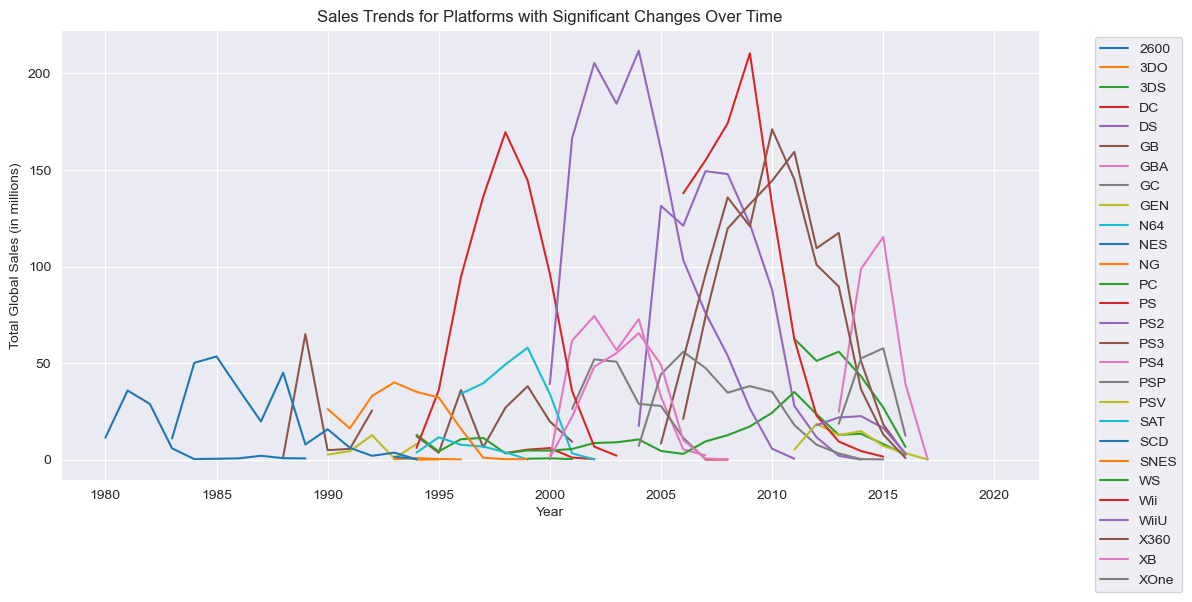

In [6]:
# Group the data by "Platform" and "Year" and calculate total global sales
platform_sales_by_year = df_cleaned.groupby(['Platform', 'Year'])['Global_Sales'].sum().unstack()

# Identify platforms with significant changes in sales
significant_platforms = []

for platform in platform_sales_by_year.index:
    sales = platform_sales_by_year.loc[platform]
    if sales.max() > 2 * sales.min():  # Define a threshold for significant change (adjust as needed)
        significant_platforms.append(platform)

# Create line plots to visualize sales trends for significant platforms
plt.figure(figsize=(12, 6))
plt.title('Sales Trends for Platforms with Significant Changes Over Time')

for platform in significant_platforms:
    plt.plot(platform_sales_by_year.loc[platform], label=platform)

plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()